# Singular Value Decomposition, SVD
## 奇异值分解

任意一个$m$ x $n$ 矩阵，都可以表示为三个矩阵的乘积（因子分解）形式，分别是$m$阶**正交矩阵**，由**降序**排列的**非负**的对角线元素组成的$m$ x $n$ 矩形对角矩阵，和$n$阶**正交矩阵**，称为该矩阵的奇异值分解。矩阵的奇异值分解一定存在，但不唯一。  

奇异值分解可以看作是矩阵数据压缩的一种方法，即用因子分解的方式近似地表示原始矩阵，这种近似是在平方损失意义下的最优近似。

矩阵的奇异值分解是指，将一个非零的$m$ x $n$ **实矩阵**$A, A\in R^{m\times n}$表示为一下三个实矩阵乘积形式的运算：  
$A = U\Sigma V^{T}$,  
其中 $U$ 是 $m$ 阶正交矩阵， $V$ 是 $n$ 阶正交矩阵，$\Sigma$ 是由降序排列的非负的对角线元素组成的$m$ x $n$矩形对角矩阵。称为$A$ 的奇异值分解。 $U$的列向量称为左奇异向量， $V$的列向量称为右奇异向量。  

奇异值分解不要求矩阵$A$ 是方阵，事实上矩阵的奇异值分解可以看作方阵的对角化的推广。  

**紧奇奇异值分解**是与原始矩阵等秩的奇异值分解， **截断奇异值分解**是比原始矩阵低秩的奇异值分解。

---------------------------------------------------------------------------------------------------------------------------------

In [0]:
# 实现奇异值分解， 输入一个numpy矩阵，输出 U, sigma, V
# https://zhuanlan.zhihu.com/p/54693391

import numpy as np


#基于矩阵分解的结果，复原矩阵
def rebuildMatrix(U, sigma, V):
    a = np.dot(U, sigma)
    a = np.dot(a, np.transpose(V))
    return a


#基于特征值的大小，对特征值以及特征向量进行排序。倒序排列
def sortByEigenValue(Eigenvalues, EigenVectors):
    index = np.argsort(-1*Eigenvalues)
    Eigenvalues = Eigenvalues[index]
    EigenVectors = EigenVectors[:,index]
    return Eigenvalues, EigenVectors


#对一个矩阵进行奇异值分解
def SVD(matrixA, NumOfLeft=None):
    #NumOfLeft是要保留的奇异值的个数，也就是中间那个方阵的宽度
    #首先求transpose(A)*A
    matrixAT_matrixA = np.dot(np.transpose(matrixA), matrixA)
    #然后求右奇异向量
    lambda_V, X_V = np.linalg.eig(matrixAT_matrixA)
    lambda_V, X_V = sortByEigenValue(lambda_V, X_V)
    #求奇异值
    sigmas = lambda_V
    sigmas = list(map(lambda x: np.sqrt(x) if x>0 else 0, sigmas))#python里很小的数有时候是负数
    sigmas = np.array(sigmas)
    sigmasMatrix = np.diag(sigmas)
    if NumOfLeft==None:
        rankOfSigmasMatrix = len(list(filter(lambda x: x>0, sigmas)))#大于0的特征值的个数
    else:
        rankOfSigmasMatrix =NumOfLeft
    sigmasMatrix = sigmasMatrix[0:rankOfSigmasMatrix, :]#特征值为0的奇异值就不要了

    #计算右奇异向量
    X_U = np.zeros((matrixA.shape[0], rankOfSigmasMatrix))#初始化一个右奇异向量矩阵，这里直接进行裁剪
    for i in range(rankOfSigmasMatrix):
        X_U[:,i] = np.transpose(np.dot(matrixA,X_V[:, i])/sigmas[i])

    #对右奇异向量和奇异值矩阵进行裁剪
    X_V = X_V[:,0:NumOfLeft]
    sigmasMatrix = sigmasMatrix[0:rankOfSigmasMatrix, 0:rankOfSigmasMatrix]
    #print(rebuildMatrix(X_U, sigmasMatrix, X_V))
    
    return X_U, sigmasMatrix, X_V

In [6]:
A = np.array([[0, 0, 0, 2, 2], [0, 0, 0, 3, 3], [0, 0, 0, 1, 1], [1, 1, 1, 0, 0],
              [2, 2, 2, 0, 0], [5, 5, 5, 0, 0], [1, 1, 1, 0, 0]])

A

array([[0, 0, 0, 2, 2],
       [0, 0, 0, 3, 3],
       [0, 0, 0, 1, 1],
       [1, 1, 1, 0, 0],
       [2, 2, 2, 0, 0],
       [5, 5, 5, 0, 0],
       [1, 1, 1, 0, 0]])

In [0]:
X_U, sigmasMatrix, X_V = SVD(A, NumOfLeft=3)

In [9]:
X_U

array([[0.00000000e+00, 5.34522484e-01, 0.00000000e+00],
       [0.00000000e+00, 8.01783726e-01, 0.00000000e+00],
       [0.00000000e+00, 2.67261242e-01, 0.00000000e+00],
       [1.79605302e-01, 0.00000000e+00, 6.58544508e-10],
       [3.59210604e-01, 0.00000000e+00, 1.31708902e-09],
       [8.98026510e-01, 0.00000000e+00, 5.26835606e-09],
       [1.79605302e-01, 0.00000000e+00, 6.58544508e-10]])

In [10]:
sigmasMatrix

array([[9.64365076e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.29150262e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.42936970e-08]])

In [11]:
X_V

array([[ 0.57735027,  0.        , -0.81649658],
       [ 0.57735027,  0.        ,  0.40824829],
       [ 0.57735027,  0.        ,  0.40824829],
       [ 0.        ,  0.70710678,  0.        ],
       [ 0.        ,  0.70710678,  0.        ]])

In [12]:
# rebuild from U, sigma, V

rebuildMatrix(X_U, sigmasMatrix, X_V)

array([[0., 0., 0., 2., 2.],
       [0., 0., 0., 3., 3.],
       [0., 0., 0., 1., 1.],
       [1., 1., 1., 0., 0.],
       [2., 2., 2., 0., 0.],
       [5., 5., 5., 0., 0.],
       [1., 1., 1., 0., 0.]])

same as A.

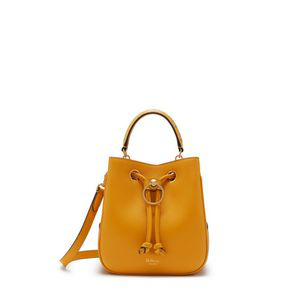

In [51]:
from PIL import Image
import requests
from io import BytesIO

url = 'https://images.mulberry.com/i/mulberrygroup/RL5792_000N651_L/small-hampstead-deep-amber-small-classic-grain-ayers/small-hampstead-deep-amber-small-classic-grain-ayers?v=3&w=304'
response = requests.get(url)
img = Image.open(BytesIO(response.content));img